### SETUP: 1 means BAD, 0 means GOOD

In [2]:
from src.utils import set_env
set_env(level=3)
import torch
from PIL import Image

import os
import pandas as pd
from IPython.display import display
import IPython


354 3013


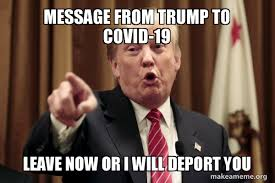

,clean_sent,org_sent,bert_tokens,label,img,race,entity,ent_tokens,race_tokens
2,MESSAGE FROM TRUMP TOCOVID-19LEAVE NOW OR I WI...,MESSAGE FROM TRUMP TO\nCOVID-19\nLEAVE NOW OR ...,"[101, 4471, 2013, 8398, 2000, 3597, 17258, 101...",0,covid_memes_5429.png,East Asian Male East Asian Male,good CANCELED - 2020 Crystal River Scallop Fe...,"[101, 2204, 13261, 1011, 12609, 6121, 2314, 80...","[101, 2264, 4004, 3287, 2264, 4004, 3287, 102]"


In [3]:

FEATURE_PATH='../Data/'
HARM_DATA='../../HarMeme_Images/'
HARM_IMAGE_PATH=f'{HARM_DATA}/harmeme_images_covid_19'

def get_harm_image_pil(pic_index):
    return Image.open(os.path.join(HARM_IMAGE_PATH,f'covid_memes_{pic_index}.png'))

CUDA_DEVICE=0
torch.cuda.set_device(CUDA_DEVICE)
device = torch.device("cuda:"+str(CUDA_DEVICE))
def get_image_ipython(name):
    WIDTH=200
    return IPython.display.Image(os.path.join(HARM_IMAGE_PATH,name),width=WIDTH, height=WIDTH/1.5)
harm_test=pd.read_json(os.path.join(FEATURE_PATH,
                                 'harm_test.json'))
harm_train=pd.read_json(os.path.join(FEATURE_PATH,
                                 'harm_train.json'))
print (len(harm_test),len(harm_train))
pic=5429
[display(get_image_ipython(f'covid_memes_{x}.png')) for x in [pic]]
harm_train[harm_train.img.apply(lambda x:str(pic) in x)]
harm_test[harm_test.img.apply(lambda x:str(pic) in x)]

In [4]:
extra_data=pd.read_json(os.path.join(HARM_DATA,'more_annotate/train.jsonl'), lines=True)
extra_test=pd.read_json(os.path.join(HARM_DATA,'more_annotate/test.jsonl'), lines=True)
print(f"Total in train {len(extra_data)}, in test: {len(extra_test)}")
print(extra_data.labels.apply(lambda x:x[0]).value_counts())
print(extra_data.labels.apply(lambda x:x[1] if len(x)>1 else "Nham").value_counts())
# extra_data[extra_data.labels].head(3)

Total in train 3013, in test: 354
labels
not harmful         1949
somewhat harmful     882
very harmful         182
Name: count, dtype: int64
labels
Nham            1949
individual       413
community        321
society          255
organization      75
Name: count, dtype: int64


In [6]:
extra_test[extra_test.id.apply(lambda x:'5426' in x)]

,id,image,labels,text
1,covid_memes_5426,covid_memes_5426.png,[not harmful],Armani\n@historyofarmani\nBiden after hearing ...


In [7]:
print(harm_train.img.apply(lambda x:x[:10]).value_counts())
harm_train.head(2)

img
covid_meme    3013
Name: count, dtype: int64


,clean_sent,org_sent,bert_tokens,label,img,race,entity,ent_tokens,race_tokens
0,Bernie or ElizabethBe informedCompare them on ...,Bernie or Elizabeth?\nBe informed.Compare them...,"[101, 15941, 2030, 3870, 4783, 6727, 9006, 193...",1,covid_memes_18.png,White Male White Female,United States Senator Super Tuesday Massachuse...,"[101, 2142, 2163, 5205, 3565, 9857, 4404, 4883...","[101, 2317, 3287, 2317, 2931, 102]"
1,Extending theBrexit deadline untilOctober 31st...,Extending the\nBrexit deadline until\nOctober ...,"[101, 8402, 1996, 13578, 9048, 2102, 15117, 21...",1,covid_memes_19.png,White Male White Male White Male,Visual arts Design Human Human behavior Font P...,"[101, 5107, 2840, 2640, 2529, 2529, 5248, 1548...","[101, 2317, 3287, 2317, 3287, 2317, 3287, 102]"


### Bad (hateful)

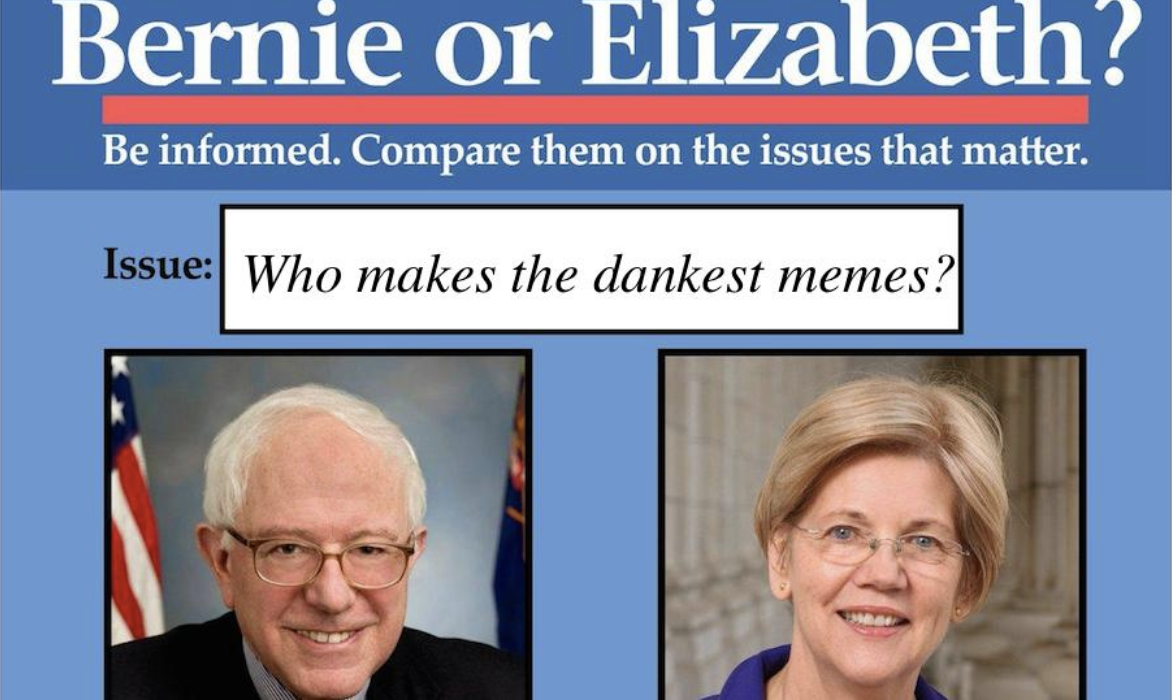

Image: covid_memes_18.png, Original: Bernie or Elizabeth?
Be informed.Compare them on the issues that matter.
Issue: Who makes the dankest memes?
====
Clean: Bernie or ElizabethBe informedCompare them on the issues that matterIssue Who makes the dankest memes


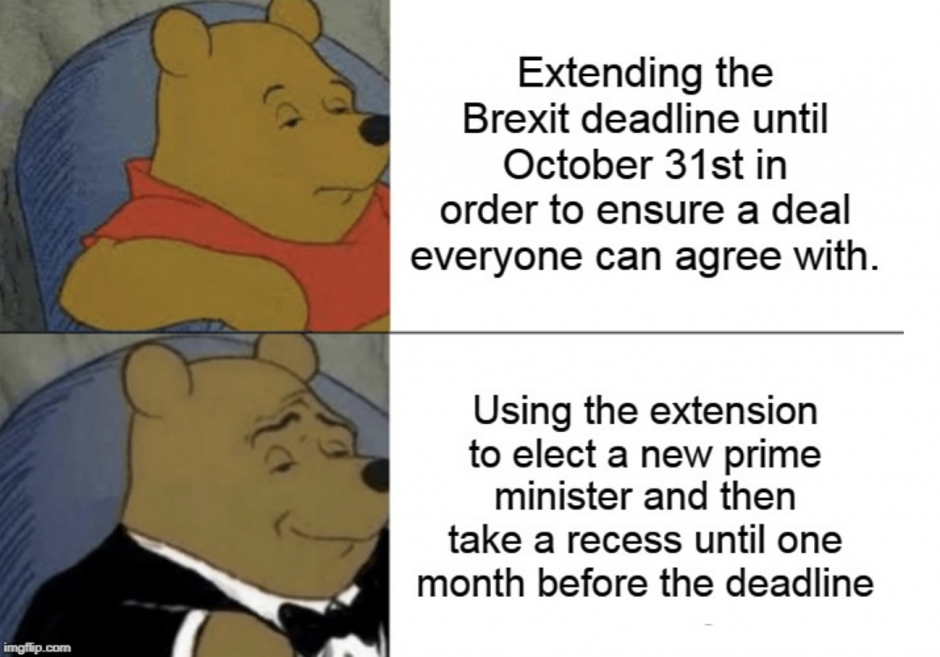

Image: covid_memes_19.png, Original: Extending the
Brexit deadline until
October 31st in
order to ensure a deal
everyone can agree with.
Using the extension
to elect a new prime
minister and then
take a recess until one
month before the deadline
imgflip.com
====
Clean: Extending theBrexit deadline untilOctober 31st inorder to ensure a dealeveryone can agree withUsing the extensionto elect a new primeminister and thentake a recess until onemonth before the deadlineimgflipcom


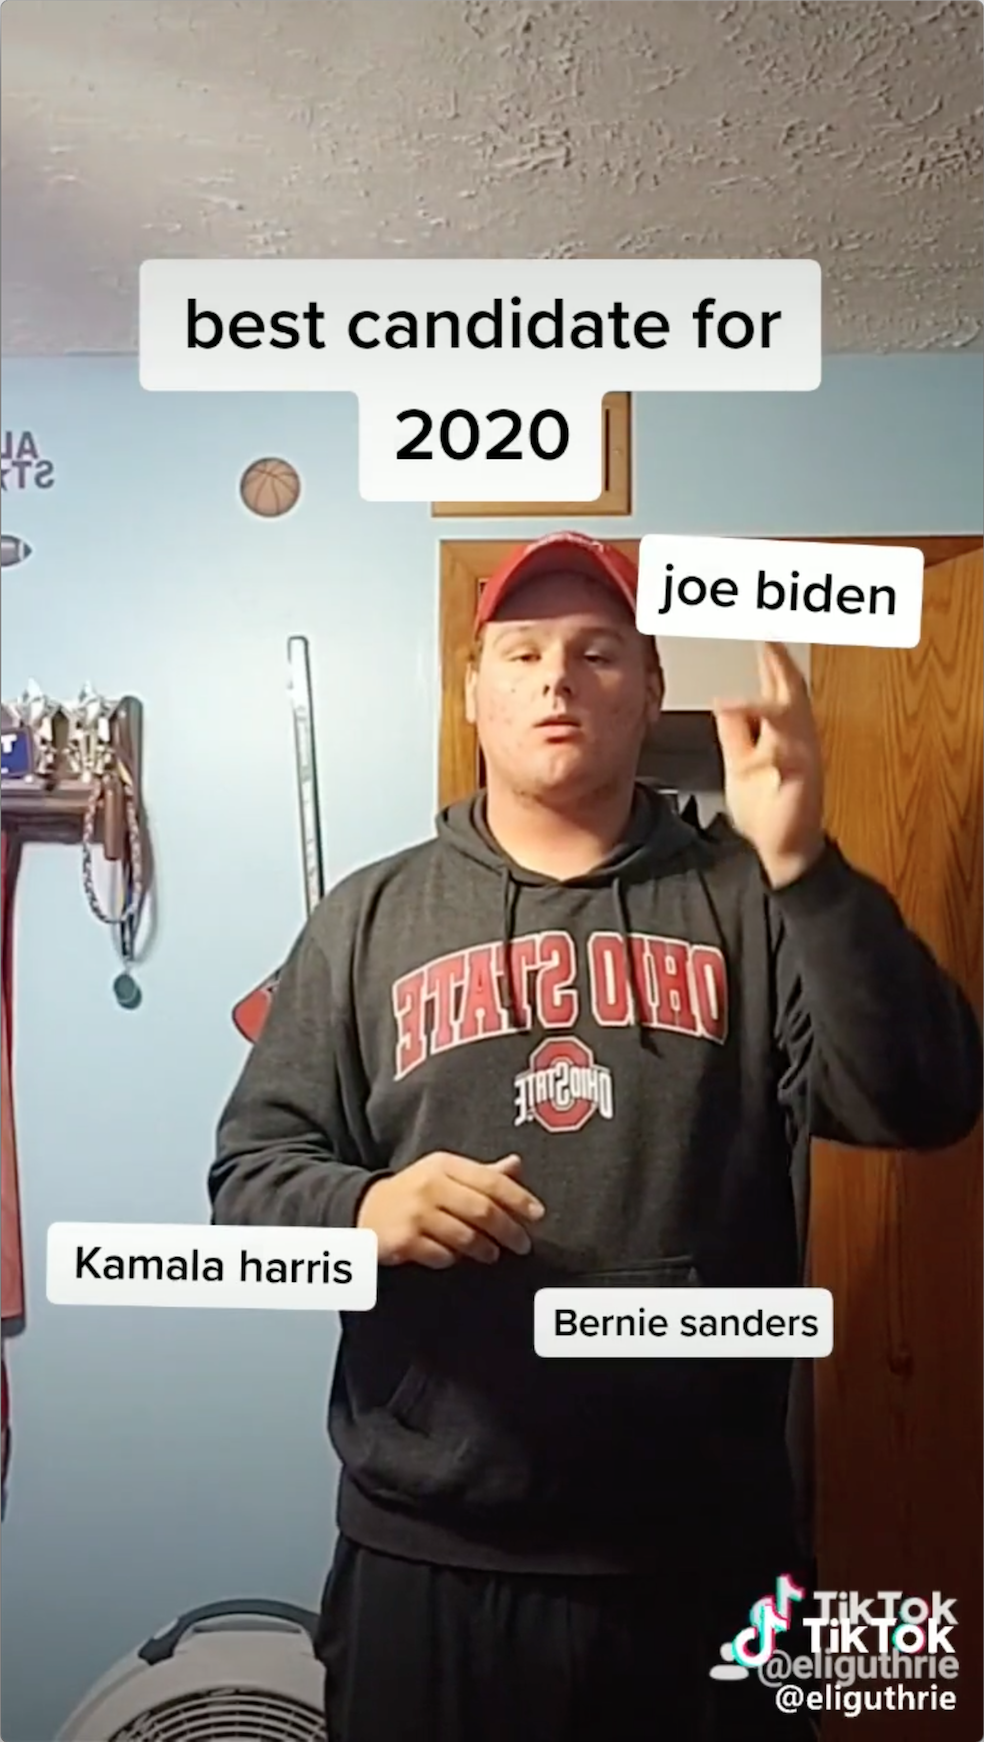

Image: covid_memes_20.png, Original: best candidate for
JA
2020
joe biden
Kamala harris
Bernie sanders
TikTok
@eliguthrie
====
Clean: best candidate forJA2020joe bidenKamala harrisBernie sandersTikTokUSER


In [17]:
kk=harm_train[harm_train.label==1][:3]
for _,x in kk.iterrows():
    display(get_image_ipython(x.img))
    print(f"Image: {x.img}, Original: {x.org_sent}\n====\nClean: {x.clean_sent}")

### Good (non-hateful)

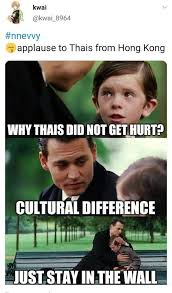

Original: kwai
gkwa 0964
#nnevvy
applause to Thais from Hong Kong
WHY THAIS DID NOT GET HURT?
CULTURAL DIFFERENCE
JUST STAY IN THE WALL
====
Clean: kwaigkwa 0964#nnevvyapplause to Thais from Hong KongWHY THAIS DID NOT GET HURTCULTURAL DIFFERENCEJUST STAY IN THE WALL


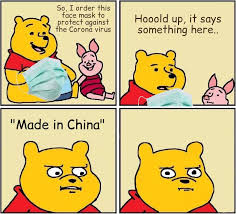

Original: So, I order this
foce mask to
protect ogainst
fhe Corond virus
Hooold up, it says
something here.
"Made in China"
====
Clean: So I order thisfoce mask toprotect ogainstfhe Corond virusHoold up it sayssomething hereMade in China


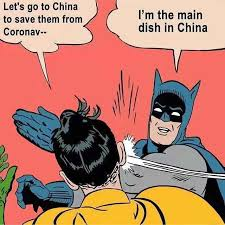

Original: Let's go to China
to save them from
I'm the main
dish in China
Coronav--
====
Clean: let us go to Chinato save them fromIm the maindish in ChinaCoronav--


In [ ]:
kk=harm_train[harm_train.label==0][:3]
for _,x in kk.iterrows():
    get_image_ipython(x.img)
    print(f"Original: {x.org_sent}\n====\nClean: {x.clean_sent}")

## Run model

In [ ]:
from lavis.common.gradcam import getAttMap
from lavis.models import load_model_and_preprocess
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device
)
def generate_prompt_result(im,ques):
    image = vis_processors["eval"](im).float().unsqueeze(0).to(device)
    ans = model.generate({"image": image, 
                          "prompt": ("Question: %s Answer:" % (ques))},
                         length_penalty=3.0)
    return ans[0]
model=model.float()

In [30]:
all_files=['animal','country','gender','race','religion','valid_animal','valid_disable']
import pickle
caption_version='Longer-Captions' #'Captions'
test_race, train_race=({file:pickle.load(open(f'../Ask-Captions/{caption_version}/harm/{which}_{file}.pkl','rb')) for file in all_files} for which in ['test','train'])
# print(f"Len test:{len(test_race)}, train {len(train_race)}")
# test_race=pickle.load(open('../Ask-Captions/Longer-Captions/harm/test_race.pkl','rb'))
# train_race=pickle.load(open('../Ask-Captions/Longer-Captions/harm/train_race.pkl','rb'))
# print(f"Len test:{len(test_race)}, train {len(train_race)}")

In [31]:
df=pd.DataFrame(columns=['dataset','topic','pic','prompt'])
for dataset, datasetname in zip([test_race, train_race], ['test','train']):
    for key in dataset:
        for pic, prompt in dataset[key].items():
            df.loc[len(df)]=[datasetname,key, pic, prompt]
df

,dataset,topic,pic,prompt
0,test,animal,covid_memes_1076.png,a man in a white shirt is throwing a piece of ...
1,test,animal,covid_memes_562.png,a dog is in the image with a bottle of hand sa...
2,test,animal,covid_memes_5516.png,a barbie doll with a bottle of wine and a bott...
3,test,animal,covid_memes_35.png,a man with a squirt bottle on his eye
4,test,animal,covid_memes_592.png,a lion with a lion's head on a tiger's tiger's...
...,...,...,...,...
23564,train,valid_disable,covid_memes_4780.png,"yes, there is a gnome holding a toilet paper roll"
23565,train,valid_disable,covid_memes_2509.png,no there are no disabled people in the image
23566,train,valid_disable,covid_memes_2608.png,"no, there are no disabled people in the image"
23567,train,valid_disable,covid_memes_4958.png,no there are no disabled people in the image


In [33]:
df[df.apply(lambda x:x.topic=='valid_animal' and 'yes' in x.prompt,axis=1)]

,dataset,topic,pic,prompt
1780,test,valid_animal,covid_memes_632.png,yes there is a dog in the bath tub with a man ...
1788,test,valid_animal,covid_memes_1266.png,"yes, there is a monkey in the image"
1845,test,valid_animal,covid_memes_1176.png,yes there is a cat in the image
1852,test,valid_animal,covid_memes_5447.png,yes there is a tiger in the image
1866,test,valid_animal,covid_memes_1157.png,"yes, a dog is wearing a mask in one image and ..."
...,...,...,...,...
20506,train,valid_animal,covid_memes_3672.png,yes there is a hamster in the image
20510,train,valid_animal,covid_memes_2179.png,yes there is a black bear in the image
20524,train,valid_animal,covid_memes_3856.png,yes there is a horse in the image
20545,train,valid_animal,covid_memes_4241.png,yes there is a dog in the image


NameError: name 'get_image_ipython' is not defined

In [40]:
race_ques='what is the race of the person in the image?'
gender_ques='what is the gender of the person in the image?'
country_ques='which country does the person in the image come from?'
anima_ques='what animal is in the image?'
religion_ques='what is the religion of the person in the image?'
valid_animal_present_ques='is there an animal in the image?'
valid_person_present_ques='is there a person in the image?'
valid_disable_ques='are there disabled people in the image?'


In [ ]:
generate_prompt_result(get_harm_image_pil(5426),valid_animal_present_ques)

'no, there is no animal in the image'